In [78]:
import pickle
import tensorflow as tf
import tensorflow as tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Loading the data
from keras.datasets import cifar10

# Training and datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
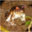

In [80]:
# print the first image of train dataset as an array
x_train[0]

The image label is: [6]


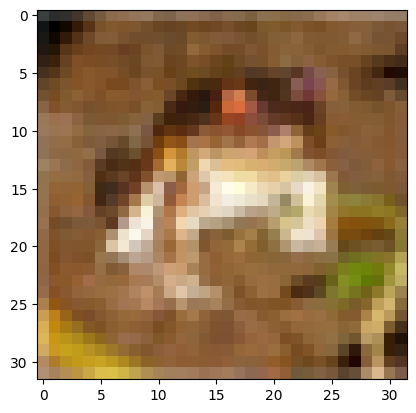

In [81]:
# print img as a picture
img = plt.imshow(x_train[0])

# get image label
print(f'The image label is: {y_train[0]}')

In [82]:
# Labeling the classes
classifications = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# get image label and label name
print(f'The image label is: {classifications[y_train[0][0]]}')

The image label is: frog


In [83]:
# Convert labels into set of 10 ints for input into neural network
y_train_new_label = to_categorical(y_train)
y_test_new_label = to_categorical(y_test)

In [84]:
# Print new labels
print(y_train_new_label)

# print labels of image printed above (frog)
print(y_train_new_label[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [85]:
# Normalize pixels into values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

# Validation
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [86]:
# Build model
# Create models arch
model = Sequential()

# Add first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# add another pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add another dropout
model.add(Dropout(0.5))

# Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
hist = model.fit(
    x_train,
    y_train_new_label,
    batch_size=256,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 431ms/step - accuracy: 0.2399 - loss: 2.0103 - val_accuracy: 0.4323 - val_loss: 1.5691
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 433ms/step - accuracy: 0.4606 - loss: 1.4715 - val_accuracy: 0.5152 - val_loss: 1.3384
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 395ms/step - accuracy: 0.5272 - loss: 1.3088 - val_accuracy: 0.5704 - val_loss: 1.2076
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 386ms/step - accuracy: 0.5696 - loss: 1.2171 - val_accuracy: 0.5733 - val_loss: 1.1989
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 392ms/step - accuracy: 0.6021 - loss: 1.1286 - val_accuracy: 0.6090 - val_loss: 1.1244
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 378ms/step - accuracy: 0.6233 - loss: 1.0553 - val_accuracy: 0.6286 - val_loss: 1.0433
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 380ms/step - accuracy: 0.6544 - loss: 0.9823 - val_accuracy: 0.6333 - val_loss: 1.0435
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 381ms/step - accuracy: 0.6746 - loss: 0

In [88]:
# Evaluate model
model.evaluate(x_test, y_test_new_label)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6736 - loss: 0.9378


0.6693000197410583

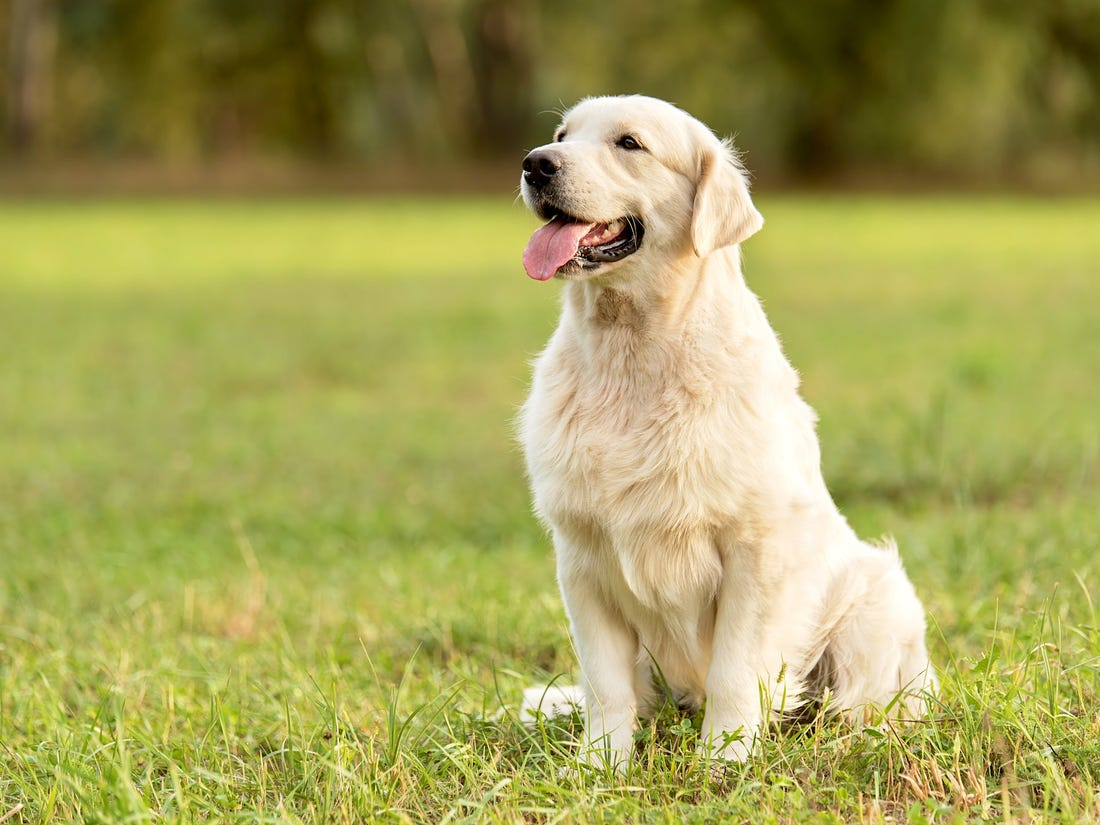

In [89]:
# Test the model
# show image
from IPython.display import Image
Image(filename='/content/dog_test.jpeg')

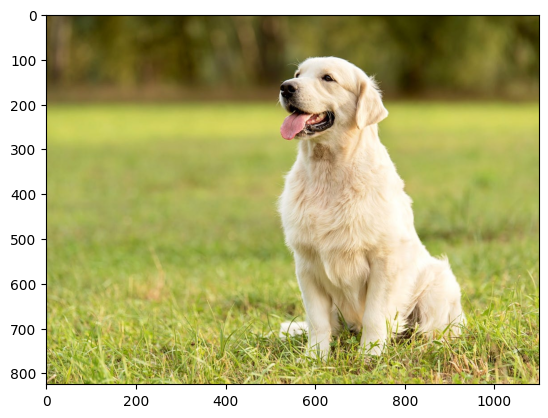

In [90]:
# Show image
test_img = plt.imread('/content/dog_test.jpeg')
plt.imshow(test_img)

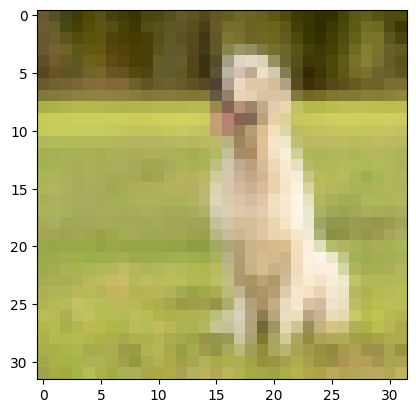

In [91]:
# Resize image to 32x32 depth 3
from skimage.transform import resize
resized_img = resize(test_img, (32, 32, 3))

plt.imshow(resized_img)

In [92]:
# test if model can predict a dog
# get predictions
predictions = model.predict(np.array([resized_img]))

# show the predictions
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[1.9676446e-03, 1.5432948e-04, 2.5530791e-01, 1.3587262e-01,
        2.2857189e-02, 4.5834133e-01, 3.5085320e-03, 1.2118568e-01,
        1.9533433e-04, 6.0934876e-04]], dtype=float32)

In [93]:
# Highest value from results above means the ones model thinks is the most accurate
# lets sort
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
# show sorted
print(list_index)

[5, 2, 3, 7, 4, 6, 0, 9, 8, 1]


In [94]:
# show first 5 classifications
for i in range(5):
    print(classifications[list_index[i]], '-', predictions[0][list_index[i]] * 100, "%")

dog - 45.834133 %
bird - 25.530792 %
cat - 13.587262 %
horse - 12.118568 %
deer - 2.285719 %
